In [2]:
"""
The goal of this code is to load in the video feed, periodically sample a frame, check
to see where the line is within that frame, and to output an instruction to either
keep going forward or stop, then to either turn right or left, based on where the line 
is within the frame
"""

'\nThe goal of this code is to load in the video feed, periodically sample a frame, check\nto see where the line is within that frame, and to output an instruction to either\n1 -- keep going forward\n2 -- turn right\n3 -- turn left\n4 -- stop\nbased on where the line is within the frame\n'

In [3]:
#imports
from PIL import Image
#may have to import cv2 if you're testing this
import cv2 as cv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

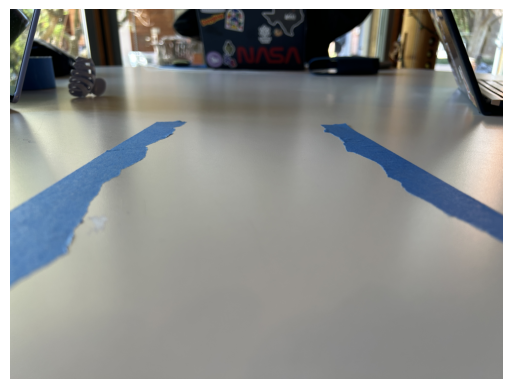

In [48]:
#specify frame we want to check to use opencv on 

#change this to frame we want to check
frame = Image.open("/Users/oliviamudrick/Downloads/IMG_1704.JPG")
frame = np.array(frame)

#show our original image
plt.imshow(frame); plt.axis(False);

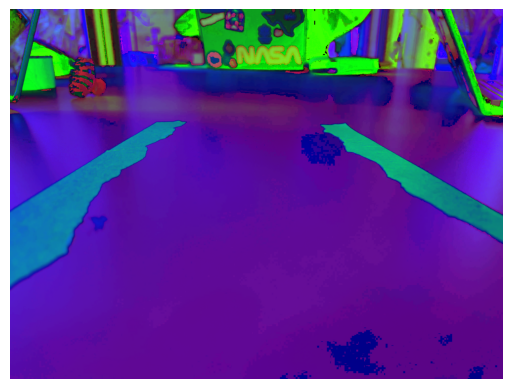

In [12]:
#convert to HSV image
hsvframe = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
#show
plt.imshow(hsvframe); plt.axis(False);


(3024, 4032)
0


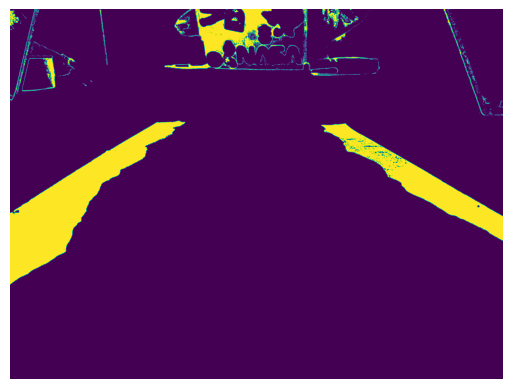

In [63]:
#select for blue in frame
blue = cv.inRange(hsvframe, (0, 100, 0), (50, 185, 255))

print(blue.shape)
print(blue[170, 250])
plt.imshow(blue); plt.axis(False);

In [66]:
#header will be the value that we send off to determine where to go
#0 -- keep going, 1 -- stop
header_stop = 0
#0 -- right, 1 -- left (should only be checked when we want to turn)
header_turn = 0
#find the center of the frame
center_x = blue.shape[0] // 2
center_y = blue.shape[1] // 2

#uncomment this to test if it works
center_x = 200
center_y = 200

#we're gonna check and see if there's a large amount of blue in the
#middle/front of the frame (don't want to turn if there's a fleck/glitch)
#define variables for amount of blue in the frame
blue_in_frame = 0
blue_on_left = 0
blue_on_right = 0

#for each pixel in the middle of the frame
for i in range(0,200):
    for j in range(0,200):
        #check top left corner
        if blue[center_x-i, center_y-j] == 255:
            blue_in_frame += 1
            blue_on_left += 1
        #check bottom left corner
        if blue[center_x+i+1, center_y-j] == 255:
            blue_in_frame += 1
            blue_on_left += 1
        #check top right corner
        if blue[center_x-i, center_y+j] == 255:
            blue_in_frame += 1
            blue_on_right += 1
        #check bottom right corner
        if blue[center_x+i+1, center_y+j] == 255:
            blue_in_frame += 1
            blue_on_right += 1
    
#if there's likely tape here, stop
if blue_in_frame >= 500:
    header_stop = 1

if blue_on_right >= blue_on_left:
    header_turn = 1

#to check values
print(blue_in_frame)
print(blue_on_left)
print(blue_on_right)
print(header_stop)
print(header_turn)


9393
8235
1158
1
0
